In [1]:
%load_ext kedro.extras.extensions.ipython

2022-04-10 18:10:24,048 - root - INFO - Updated path to Kedro project: C:\Users\Lianz\Documents\medgc-tesis
2022-04-10 18:10:24,288 - kedro.framework.session.store - INFO - `read()` not implemented for `BaseSessionStore`. Assuming empty store.


D:\Programs\Anaconda3\envs\domain-adaptation\lib\site-packages\torchvision\transforms\functional_pil.py:228: DeprecationWarning: BILINEAR is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BILINEAR instead.
  interpolation: int = Image.BILINEAR,
D:\Programs\Anaconda3\envs\domain-adaptation\lib\site-packages\torchvision\transforms\functional_pil.py:295: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  interpolation: int = Image.NEAREST,
D:\Programs\Anaconda3\envs\domain-adaptation\lib\site-packages\torchvision\transforms\functional_pil.py:311: DeprecationWarning: NEAREST is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  interpolation: int = Image.NEAREST,
D:\Programs\Anaconda3\envs\domain-adaptation\lib\site-packages\torchvision\transforms\functional_pil.py:328: DeprecationWarning: BICUBIC is deprecated and will be 

2022-04-10 18:10:28,286 - root - INFO - ** Kedro project MEDGC Tesis
2022-04-10 18:10:28,289 - root - INFO - Defined global variable `context`, `session`, `catalog` and `pipelines`


In [56]:
predicciones_afn = catalog.load("modelo_afn_predicciones")
predicciones_dann = catalog.load("modelo_dann_predicciones")
predicciones_adda = catalog.load("modelo_adda_predicciones")

2022-04-10 18:28:34,499 - kedro.io.data_catalog - INFO - Loading data from `modelo_afn_predicciones` (CSVDataSet)...
2022-04-10 18:28:34,672 - kedro.io.data_catalog - INFO - Loading data from `modelo_dann_predicciones` (CSVDataSet)...
2022-04-10 18:28:34,843 - kedro.io.data_catalog - INFO - Loading data from `modelo_adda_predicciones` (CSVDataSet)...


In [78]:
import pandas as pd

In [79]:
for algoritmo, prediccion in zip(['afn', 'dann', 'adda'], [predicciones_afn, predicciones_dann, predicciones_adda]):
    prediccion['algoritmo'] = algoritmo

predicciones = pd.concat([predicciones_afn, predicciones_dann, predicciones_adda], ignore_index=True)
predicciones = predicciones.drop(columns=['cant_digitos', 'min_size_digitos', 'max_size_digitos', 'min_prop_blanco_digitos', 'max_prop_blanco_digitos'])
predicciones['acierto'] = (predicciones['votos'] == predicciones['voto_predicho']).astype(int)

In [80]:
predicciones.groupby(['algoritmo', 'partido', 'tipo']).agg(
    cantidad_real=('votos', 'sum'),
    cantidad_pred=('voto_predicho', 'sum'),
    iou_promedio=('iou', 'mean'),
    acierto_exacto_promedio=('acierto', 'mean'),
)

cantidad_real  \
algoritmo partido                                        tipo                                  
adda      FRENTE AMPLIO PROGRESISTA                      DIPUTADOS NACIONALES         179519   
                                                         SENADORES NACIONALES         184205   
          FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD DIPUTADOS NACIONALES          32303   
                                                         SENADORES NACIONALES          32142   
          FRENTE DE TODOS                                DIPUTADOS NACIONALES         460867   
                                                         SENADORES NACIONALES         476268   
          JUNTOS POR EL CAMBIO                           DIPUTADOS NACIONALES         594797   
                                                         SENADORES NACIONALES         599445   
          PODEMOS                                        DIPUTADOS NACIONALES          26723   
                                                         SENADORES NACIONALES          26591   
          PRIMERO SANTA FE                               DIPUTADOS NACIONALES          22687   
                                                         SENADORES NACIONALES          24533   
          SOBERANIA POPULAR                              DIPUTADOS NACIONALES          66621   
                                                         SENADORES NACIONALES          52393   
          SOMOS FUTURO                                   DIPUTADOS NACIONALES          33969   
                                                         SENADORES NACIONALES          32690   
          UNITE POR LA LIBERTAD Y LA DIGNIDAD            DIPUTADOS NACIONALES          58868   
                                                         SENADORES NACIONALES          55623   
afn       FRENTE AMPLIO PROGRESISTA                      DIPUTADOS NACIONALES         179519   
                                                         SENADORES NACIONALES         184205   
          FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD DIPUTADOS NACIONALES          32303   
                                                         SENADORES NACIONALES          32142   
          FRENTE DE TODOS                                DIPUTADOS NACIONALES         460867   
                                                         SENADORES NACIONALES         476268   
          JUNTOS POR EL CAMBIO                           DIPUTADOS NACIONALES         594797   
                                                         SENADORES NACIONALES         599445   
          PODEMOS                                        DIPUTADOS NACIONALES          26723   
                                                         SENADORES NACIONALES          26591   
          PRIMERO SANTA FE                               DIPUTADOS NACIONALES          22687   
                                                         SENADORES NACIONALES          24533   
          SOBERANIA POPULAR                              DIPUTADOS NACIONALES          66621   
                                                         SENADORES NACIONALES          52393   
          SOMOS FUTURO                                   DIPUTADOS NACIONALES          33969   
                                                         SENADORES NACIONALES          32690   
          UNITE POR LA LIBERTAD Y LA DIGNIDAD            DIPUTADOS NACIONALES          58868   
                                                         SENADORES NACIONALES          55623   
dann      FRENTE AMPLIO PROGRESISTA                      DIPUTADOS NACIONALES         179519   
                                                         SENADORES NACIONALES         184205   
          FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD DIPUTADOS NACIONALES          32303   
                                                         SENADORES NACIONALES          32142   
          FRENTE DE TODOS                      

In [81]:
predicciones.groupby(['algoritmo', 'partido']).agg(
    cantidad_real=('votos', 'sum'),
    cantidad_pred=('voto_predicho', 'sum'),
    iou_promedio=('iou', 'mean'),
    acierto_exacto_promedio=('acierto', 'mean'),
)

cantidad_real  \
algoritmo partido                                                         
adda      FRENTE AMPLIO PROGRESISTA                              363724   
          FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD          64445   
          FRENTE DE TODOS                                        937135   
          JUNTOS POR EL CAMBIO                                  1194242   
          PODEMOS                                                 53314   
          PRIMERO SANTA FE                                        47220   
          SOBERANIA POPULAR                                      119014   
          SOMOS FUTURO                                            66659   
          UNITE POR LA LIBERTAD Y LA DIGNIDAD                    114491   
afn       FRENTE AMPLIO PROGRESISTA                              363724   
          FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD          64445   
          FRENTE DE TODOS                                        937135   
          JUNTOS POR EL CAMBIO                                  1194242   
          PODEMOS                                                 53314   
          PRIMERO SANTA FE                                        47220   
          SOBERANIA POPULAR                                      119014   
          SOMOS FUTURO                                            66659   
          UNITE POR LA LIBERTAD Y LA DIGNIDAD                    114491   
dann      FRENTE AMPLIO PROGRESISTA                              363724   
          FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD          64445   
          FRENTE DE TODOS                                        937135   
          JUNTOS POR EL CAMBIO                                  1194242   
          PODEMOS                                                 53314   
          PRIMERO SANTA FE                                        47220   
          SOBERANIA POPULAR                                      119014   
          SOMOS FUTURO                                            66659   
          UNITE POR LA LIBERTAD Y LA DIGNIDAD                    114491   

                                                          cantidad_pred  \
algoritmo partido                                                         
adda      FRENTE AMPLIO PROGRESISTA                              504872   
          FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD         214713   
          FRENTE DE TODOS                                       1161072   
          JUNTOS POR EL CAMBIO                                  1905192   
          PODEMOS                                                150739   
          PRIMERO SANTA FE                                       125941   
          SOBERANIA POPULAR                                      291811   
          SOMOS FUTURO                                           167122   
          UNITE POR LA LIBERTAD Y LA DIGNIDAD                    243061   
afn       FRENTE AMPLIO PROGRESISTA                             1397335   
          FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD        1144059   
          FRENTE DE TODOS                                       2072130   
          JUNTOS POR EL CAMBIO                                  3113318   
          PODEMOS                                               1087273   
          PRIMERO SANTA FE                                      1041385   
          SOBERANIA POPULAR                                     1202752   
          SOMOS FUTURO                                          1089807   
          UNITE POR LA LIBERTAD Y LA DIGNIDAD                   1126573   
dann      FRENTE AMPLIO PROGRESISTA                              500996   
          FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD         213946   
          FRENTE DE TODOS                                       1183813   
          JUNTOS POR EL CAMBIO                                  1956148   
          PODEMOS                                                150848   
       

In [82]:
predicciones.groupby(['algoritmo', 'tipo']).agg(
    cantidad_real=('votos', 'sum'),
    cantidad_pred=('voto_predicho', 'sum'),
    iou_promedio=('iou', 'mean'),
    acierto_exacto_promedio=('acierto', 'mean'),
)

cantidad_real  cantidad_pred  iou_promedio  \
algoritmo tipo                                                               
adda      DIPUTADOS NACIONALES        1476354        2376934      0.813903   
          SENADORES NACIONALES        1483890        2387589      0.814661   
afn       DIPUTADOS NACIONALES        1476354        6685118      0.542125   
          SENADORES NACIONALES        1483890        6589514      0.540201   
dann      DIPUTADOS NACIONALES        1476354        2424740      0.770638   
          SENADORES NACIONALES        1483890        2414102      0.774074   

                                acierto_exacto_promedio  
algoritmo tipo                                           
adda      DIPUTADOS NACIONALES                 0.757122  
          SENADORES NACIONALES                 0.758128  
afn       DIPUTADOS NACIONALES                 0.361031  
          SENADORES NACIONALES                 0.360881  
dann      DIPUTADOS NACIONALES                 0.705481  
          SENADORES NACIONALES                 0.709019

In [97]:
from matplotlib import pyplot as plt

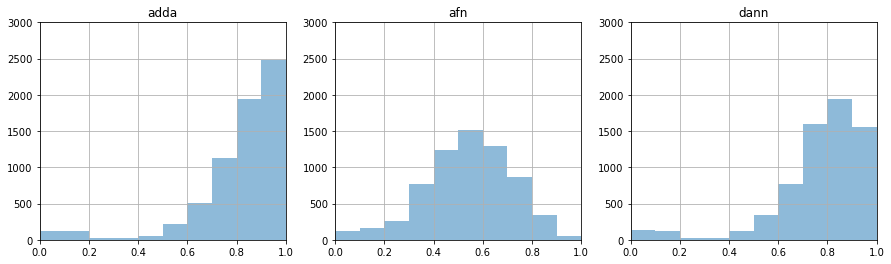

In [168]:
ious = (
    predicciones
    .groupby(['algoritmo', 'id_telegrama']).agg(
        iou=('iou', 'mean')
    )
    .reset_index()
    .groupby('algoritmo')['iou']
)

fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(15, 4))
for (i, d), ax in zip(ious, axes):
    d.hist(alpha=0.5, label=i, ax=ax)
    ax.set_title(i)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 3_000)

plt.show()


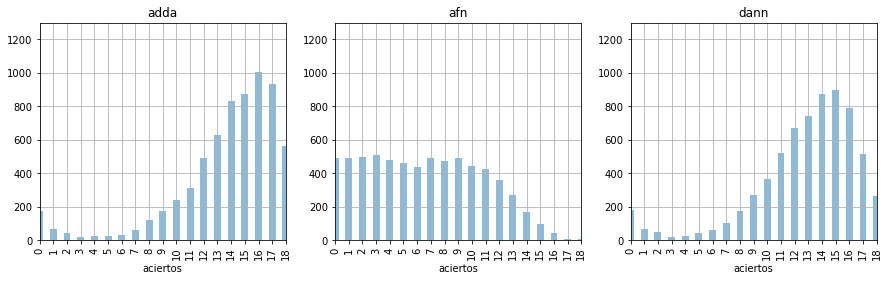

In [169]:
aciertos = (
    predicciones
    .groupby(['algoritmo', 'id_telegrama']).agg(
        aciertos=('acierto', 'sum')
    )
    .reset_index()
    .groupby(['algoritmo', 'aciertos']).size()
    .reset_index()
    .rename(columns={0: 'cantidad'})
    .groupby(['algoritmo'])
)

fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(15, 4))
for (i, d), ax in zip(aciertos, axes):
    d.set_index('aciertos').plot(kind='bar', alpha=0.5, label=i, ax=ax, legend=False)
    ax.set_title(i)
    ax.grid()
    ax.set_xlim(0, 18)
    ax.set_ylim(0, 1_300)

plt.show()

In [176]:
(
    predicciones
    .query("algoritmo == 'adda'")
    .groupby('id_telegrama')
    .agg(iou=('iou', 'mean'))
    .query("iou < 0.4")
).tail(10)

,iou
id_telegrama,
2102108032X,0.212963
2102108037X,0.000000
2102108046X,0.157407
2102208056X,0.111111
2102208059X,0.074074
2102208062X,0.129630
2102208063X,0.148148
2102208066X,0.000000
2102208172X,0.361111
